In [7]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [8]:
import yfinance as yf

In [9]:
from datetime import datetime
end= datetime.now()
start= datetime(end.year-20,end.month,end.day)

In [10]:
stock="GOOG"
google_data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [11]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-15,4.494404,4.690419,4.452063,4.604491,4.593211,477844390
2004-11-16,4.420929,4.469995,4.254802,4.297392,4.286864,839832142
2004-11-17,4.209721,4.420929,4.209223,4.296396,4.285871,728034662
2004-11-18,4.241352,4.344217,4.127778,4.172859,4.162636,667677273
2004-11-19,4.211713,4.233631,4.147454,4.219185,4.208849,352086780


In [12]:
google_data.shape

(5035, 6)

In [13]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,47.584924,48.084377,47.109843,47.603597,47.493390,1.111576e+08
std,45.472200,45.968382,45.025854,45.496734,45.402562,1.440292e+08
min,4.096396,4.221676,4.017691,4.112087,4.102013,1.584340e+05
25%,13.268516,13.381343,13.110732,13.248840,13.216383,2.669600e+07
50%,27.788706,27.920347,27.569307,27.768499,27.700472,5.195000e+07
75%,62.438751,63.183125,61.939501,62.460001,62.306986,1.357409e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [14]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-11-15 to 2024-11-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [16]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 1.0, 'Closing price of Google data')

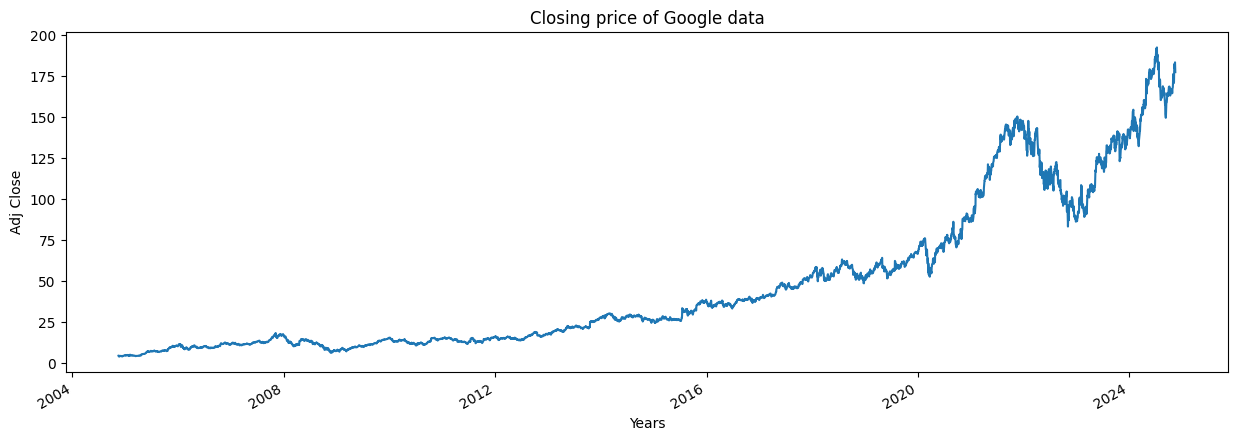

In [18]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [19]:
def plot_graph(figsize,values,column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [20]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

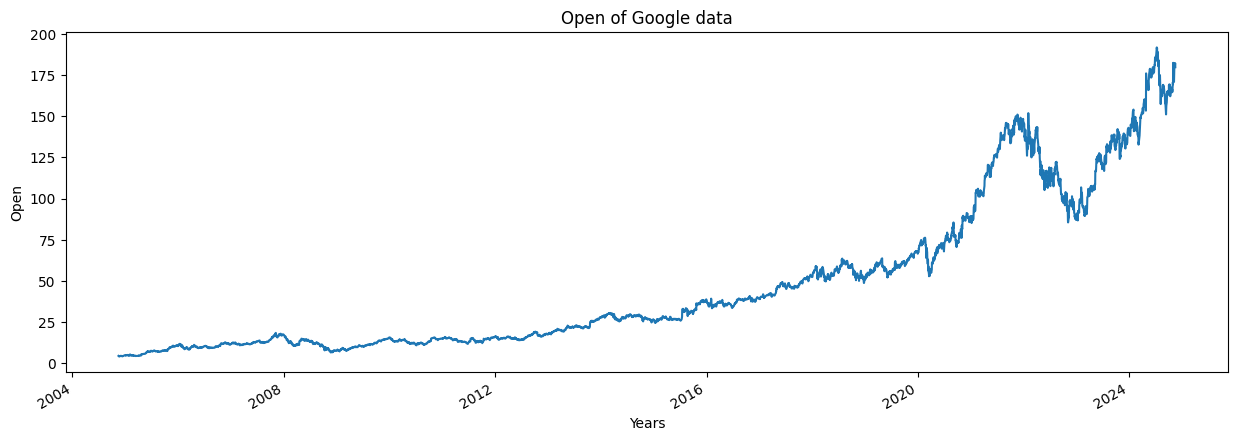

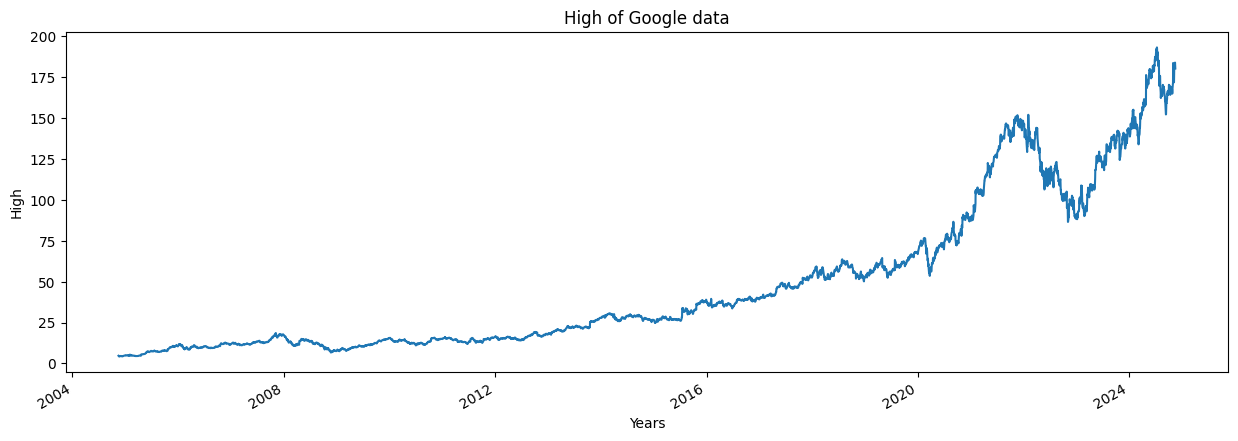

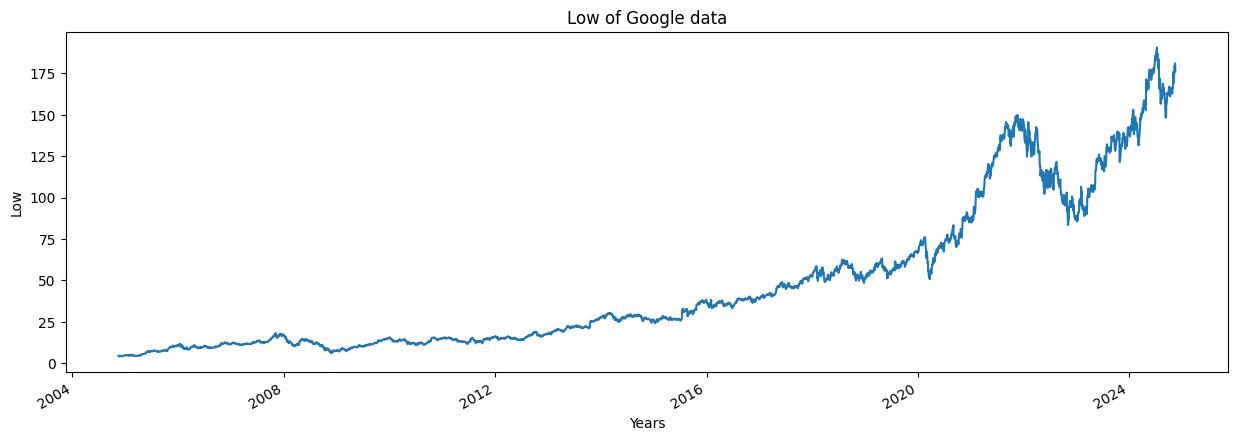

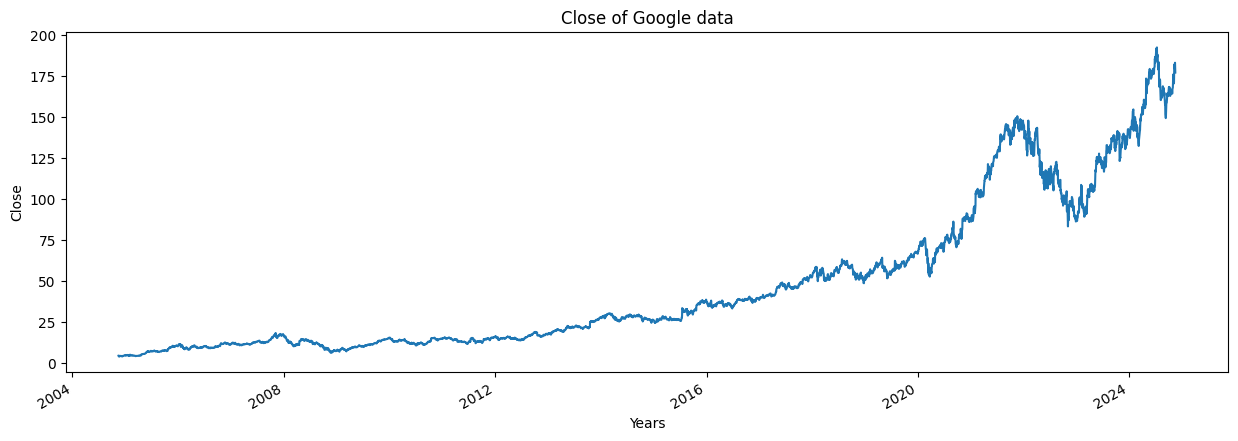

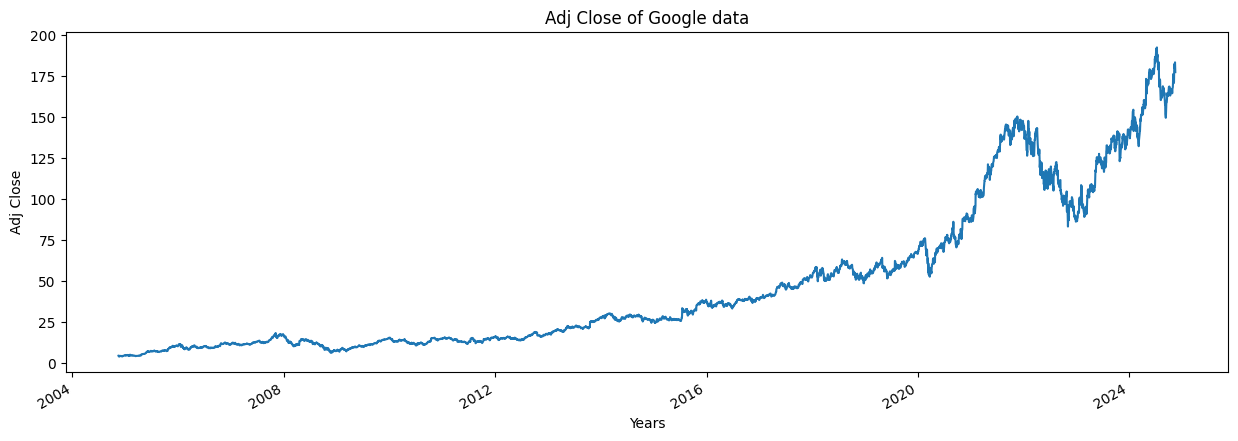

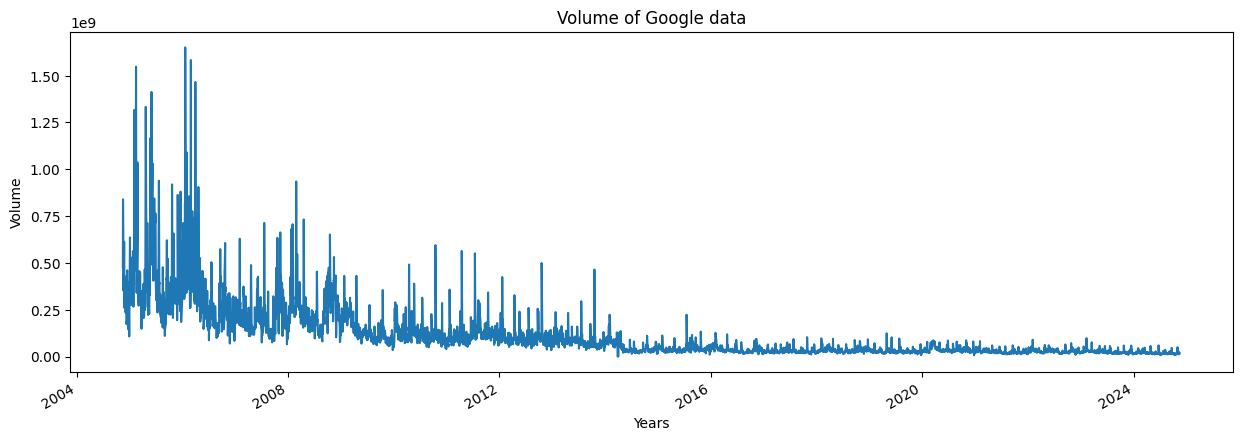

In [21]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)


In [23]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))
          


2004 33
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 221


In [24]:
google_data['MA_FOR_250_DAYS']=google_data['Adj Close'].rolling(250).mean()

<Figure size 1500x500 with 0 Axes>

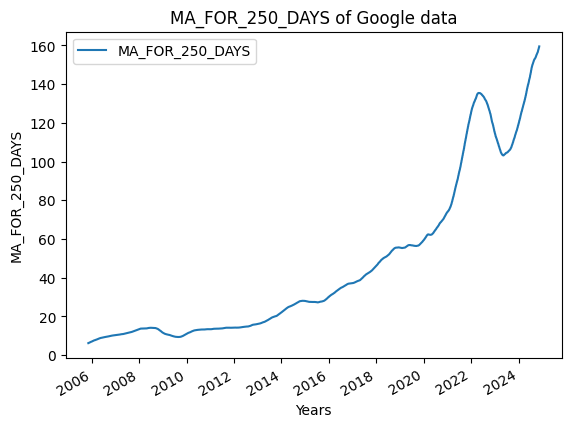

In [25]:
plot_graph((15,5),google_data[['MA_FOR_250_DAYS']],'MA_FOR_250_DAYS')

In [26]:
google_data['MA_FOR_250_DAYS'][0:250].tail()

Date
2005-11-03         NaN
2005-11-04         NaN
2005-11-07         NaN
2005-11-08         NaN
2005-11-09    6.105124
Name: MA_FOR_250_DAYS, dtype: float64

<Figure size 1500x500 with 0 Axes>

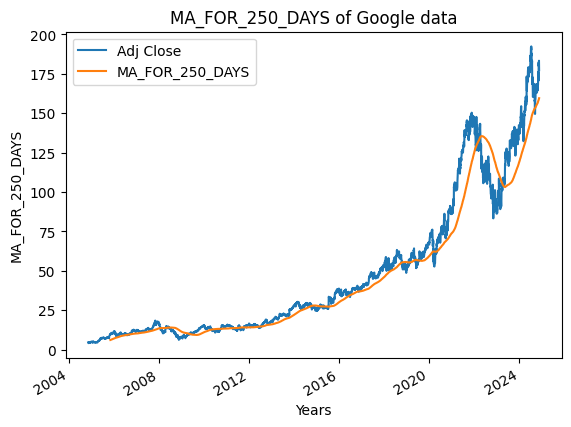

In [48]:
plot_graph((15,5),google_data[['Adj Close','MA_FOR_250_DAYS']],'MA_FOR_250_DAYS')

<Figure size 1500x500 with 0 Axes>

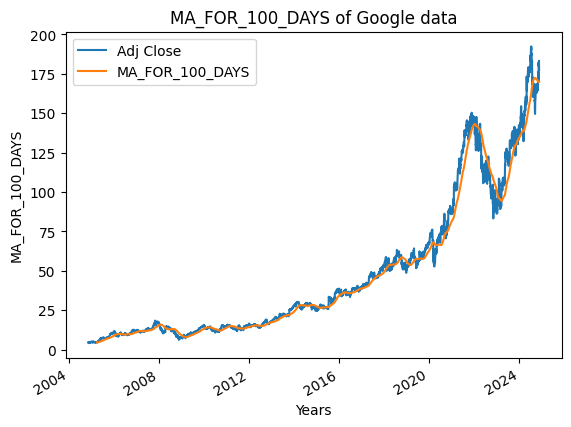

In [27]:
google_data['MA_FOR_100_DAYS']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_FOR_100_DAYS']],'MA_FOR_100_DAYS')

<Figure size 1500x500 with 0 Axes>

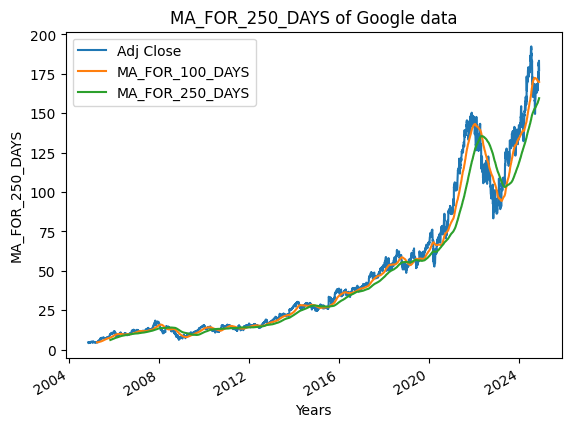

In [28]:
plot_graph((15,5),google_data[['Adj Close','MA_FOR_100_DAYS','MA_FOR_250_DAYS']],'MA_FOR_250_DAYS')

In [29]:
#percentage change in Adj close price
google_data['percentage_change_cp']=google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-11-15,4.593211,NaN
2004-11-16,4.286864,-0.066695
2004-11-17,4.285871,-0.000232
2004-11-18,4.162636,-0.028754
2004-11-19,4.208849,0.011102


<Figure size 1500x500 with 0 Axes>

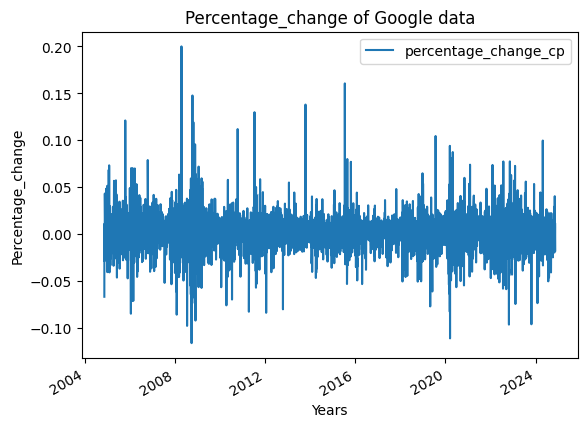

In [30]:
plot_graph((15,5),google_data[['percentage_change_cp']],'Percentage_change')

In [31]:
Adj_close_price=google_data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([4.10201311]))

In [32]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=Scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00260853],
       [0.00098166],
       [0.00097638],
       ...,
       [0.95174462],
       [0.93671578],
       [0.92004068]])

In [33]:
x_data=[]
y_data=[]
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)

In [55]:
x_data[0],y_data[0]

(array([[0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127457],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0.00496241],
        [0.00387914],
        [0.00374852],
        [0.00309408],
        [0.00379338],
        [0.00395304],
        [0.00375248],
        [0.00399526],
        [0.00398866],
        [0.00460088],
        [0.00511942],
        [0.00424859],
        [0

In [59]:
int(len(x_data)*0.7)

3454

In [34]:
spliting_len=int(len(x_data)*0.7)
x_train=x_data[:spliting_len]
y_train=y_data[:spliting_len]
x_test=x_data[spliting_len:]
y_test=y_data[spliting_len:]


In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [62]:
pip install keras

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 8.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------- ----- 2.6/3.0 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)



ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\tensorflow\\_api\\v2\\compat\\v1\\__internal__\\types\\data\\__init__.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model=Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [44]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 233s 67ms/step - loss: 2.8601e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 269s 78ms/step - loss: 7.4723e-05


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [47]:
predictions=model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [48]:
predictions

array([[0.23156975],
       [0.23352185],
       [0.23364976],
       ...,
       [0.7908403 ],
       [0.79470694],
       [0.7910064 ]], dtype=float32)

In [50]:
inv_predictions=Scaler.inverse_transform(predictions)

In [51]:
inv_y_test=Scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.72696686],
       [ 51.65364456],
       [ 52.16439438],
       ...,
       [183.32000732],
       [180.49000549],
       [177.3500061 ]])

In [52]:
rmse=np.sqrt(np.mean((inv_predictions-inv_y_test)**2))
rmse

14.181476520449634

In [57]:
import pandas as pd
ploting_data=pd.DataFrame(
    {
        'Original_test_data':inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index=google_data.index[spliting_len+100:]
)
ploting_data.head()

,Original_test_data,predictions
Date,,
2018-12-28,51.726967,47.707687
2018-12-31,51.653645,48.075279
2019-01-02,52.164394,48.099365
2019-01-03,50.678543,48.190880
2019-01-04,53.404346,47.711143


<Figure size 1500x600 with 0 Axes>

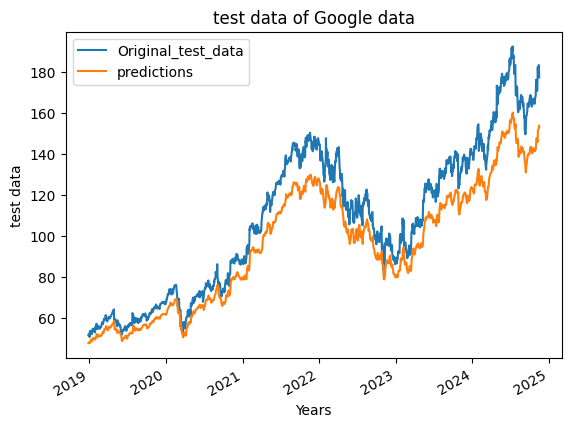

In [58]:
plot_graph((15,6),ploting_data,'test data')

<Figure size 1500x600 with 0 Axes>

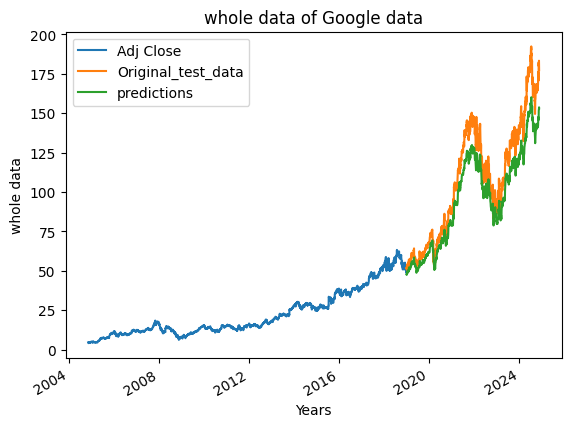

In [60]:
plot_graph((15,6),pd.concat([Adj_close_price[:spliting_len+100],ploting_data],axis=0),'whole data')

In [61]:
model.save("Latest_stock_price_model.keras")